Statement: Use this program for the screening of the resumes.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Data Visualisation**

In [32]:
df = pd.read_csv("/kaggle/input/resume-dataset/Resume/Resume.csv")
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [35]:
df.describe()

,ID
count,2.484000e+03
mean,3.182616e+07
std,2.145735e+07
min,3.547447e+06
25%,1.754430e+07
50%,2.521031e+07
75%,3.611444e+07
max,9.980612e+07


In [36]:
#Null values in entire dataframe
df.isnull().values.any()

False

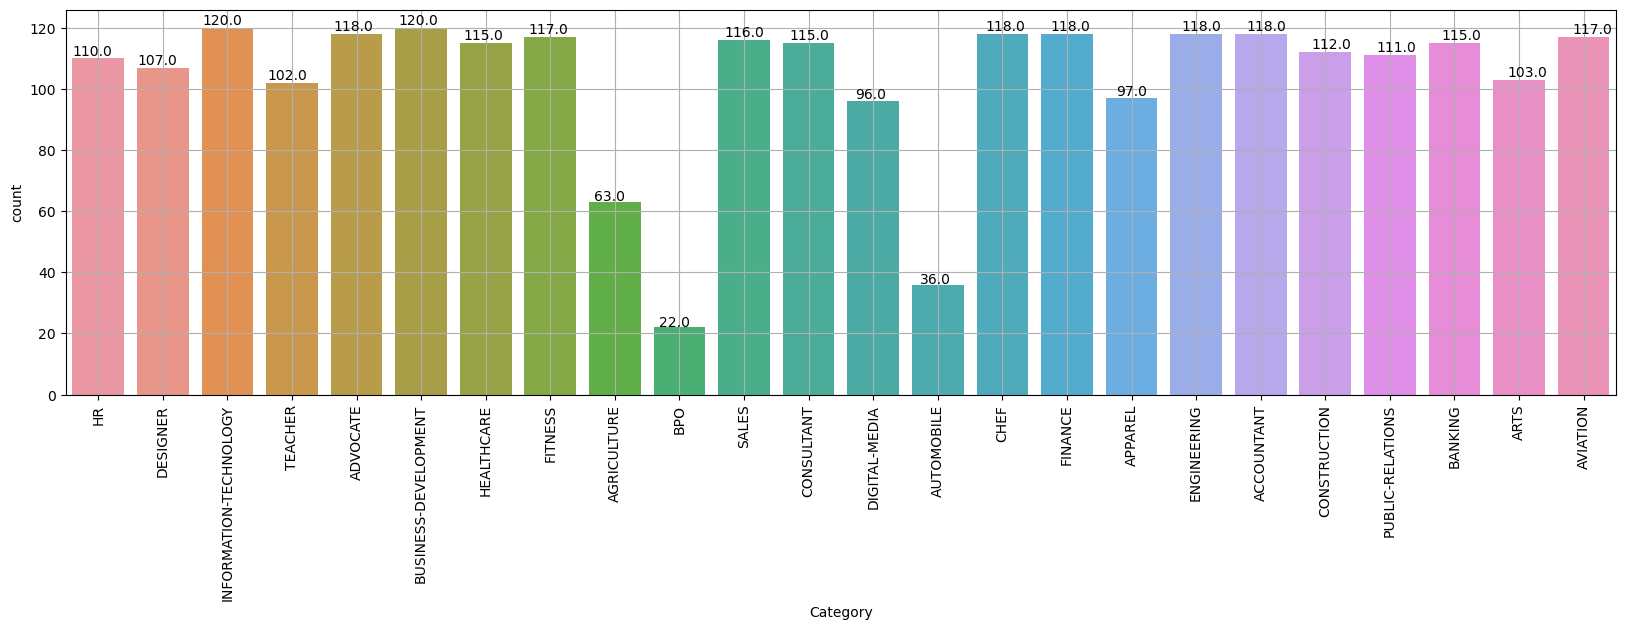

In [4]:
#Getting distribution of the resume in each category
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

In [5]:
#Reducing DataFrame size and extracting only BPO Resume for training
#reduced_df = df[df["Category"].isin(["CONSULTANT","BANKING"])] # for multiple columns
df = df[df["Category"].isin(["BPO"])]
df.reset_index(inplace=True)
df.head()

,index,ID,Resume_str,Resume_html,Category
0,972,79261033,"DIRECTOR OF OPERATIONS, BPO Exe...","<div class=""fontsize fontface vmargins hmargin...",BPO
1,973,16492045,BPO TEAM LEADER Summary Seek...,"<div class=""fontsize fontface vmargins hmargin...",BPO
2,974,18589927,CUSTOMER SERVICES Summary P...,"<div class=""fontsize fontface vmargins hmargin...",BPO
3,975,23933031,SR. WORKFORCE MANAGER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",BPO
4,976,13964744,TEAM LEAD SENIOR ANALYST Prof...,"<div class=""fontsize fontface vmargins hmargin...",BPO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        22 non-null     int64 
 1   ID           22 non-null     int64 
 2   Resume_str   22 non-null     object
 3   Resume_html  22 non-null     object
 4   Category     22 non-null     object
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [7]:
# Getting idea about unique Categories.
df['Category'].unique()

array(['BPO'], dtype=object)

# **Text Mining**

In [21]:
#Cleaning Resume_Str
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = re.sub(' +', ' ', resumeText)
    resumeText = resumeText.strip()
    return resumeText
    
df['cleaned_resume'] = df.Resume_str.apply(lambda x: cleanResume(x))
df['cleaned_resume'] = df.cleaned_resume.apply(lambda x: cleanResume(x))
df.head(5)


,index,ID,Resume_str,Resume_html,Category,cleaned_resume,Token_cleaned_resume,POS_resume,TAG_resume,Resume_Data_with_Tag,Chunked_Resume_Data,TAG_resume_Lemmatized
0,972,79261033,"DIRECTOR OF OPERATIONS, BPO Exe...","<div class=""fontsize fontface vmargins hmargin...",BPO,DIRECTOR OF OPERATIONS BPO Executive Summary R...,"[DIRECTOR, OF, OPERATIONS, BPO, Executive, Sum...","[NOUN, ADP, NOUN, NOUN, PROPN, PROPN, NOUN, VE...","[NN, IN, NNS, NN, NNP, NNP, NNS, VBD, NN, JJ, ...","[(DIRECTOR, NN), (OF, IN), (OPERATIONS, NNS), ...","[[(DIRECTOR, NN)], [(OF, IN)], [(OPERATIONS, N...","[director, of, operation, bpo, Executive, Summ..."
1,973,16492045,BPO TEAM LEADER Summary Seek...,"<div class=""fontsize fontface vmargins hmargin...",BPO,BPO TEAM LEADER Summary Seeking to provide top...,"[BPO, TEAM, LEADER, Summary, Seeking, to, prov...","[NOUN, NOUN, NOUN, NOUN, VERB, PART, VERB, ADJ...","[NN, NN, NN, NN, VBG, TO, VB, JJ, NN, NN, TO, ...","[(BPO, NN), (TEAM, NN), (LEADER, NN), (Summary...","[[(BPO, NN), (TEAM, NN), (LEADER, NN), (Summar...","[bpo, team, leader, summary, seek, to, provide..."
2,974,18589927,CUSTOMER SERVICES Summary P...,"<div class=""fontsize fontface vmargins hmargin...",BPO,CUSTOMER SERVICES Summary Professional in Econ...,"[CUSTOMER, SERVICES, Summary, Professional, in...","[PROPN, PROPN, PROPN, PROPN, ADP, PROPN, ADP, ...","[NNP, NNP, NNP, NNP, IN, NNP, IN, CD, NNS, IN,...","[(CUSTOMER, NNP), (SERVICES, NNP), (Summary, N...","[[(CUSTOMER, NNP), (SERVICES, NNP), (Summary, ...","[CUSTOMER, SERVICES, Summary, Professional, in..."
3,975,23933031,SR. WORKFORCE MANAGER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",BPO,SR WORKFORCE MANAGER Summary Results oriented ...,"[SR, WORKFORCE, MANAGER, Summary, Results, ori...","[PROPN, PROPN, NOUN, PROPN, NOUN, VERB, PROPN,...","[NNP, NNP, NN, NNP, NNS, VBD, NNP, NNP, NNP, I...","[(SR, NNP), (WORKFORCE, NNP), (MANAGER, NN), (...","[[(SR, NNP), (WORKFORCE, NNP), (MANAGER, NN), ...","[SR, WORKFORCE, manager, Summary, result, orie..."
4,976,13964744,TEAM LEAD SENIOR ANALYST Prof...,"<div class=""fontsize fontface vmargins hmargin...",BPO,TEAM LEAD SENIOR ANALYST Professional Summary ...,"[TEAM, LEAD, SENIOR, ANALYST, Professional, Su...","[NOUN, NOUN, ADJ, PROPN, PROPN, PROPN, PROPN, ...","[NN, NN, JJ, NNP, NNP, NNP, NNP, IN, NNP, NNP,...","[(TEAM, NN), (LEAD, NN), (SENIOR, JJ), (ANALYS...","[[(TEAM, NN), (LEAD, NN), (SENIOR, JJ), (ANALY...","[team, lead, senior, ANALYST, Professional, Su..."


In [9]:
df['Resume_str'][0]

"         DIRECTOR OF OPERATIONS, BPO       Executive Summary     Results-Focused management professional offering 15 years of progressive leadership experience. Transforms high-potential staff into outstanding leaders who demonstrate the creativity and savvy that is critical to financial and operational success.\xa0   High-energy Manager successful in building and motivating dynamic teams. Cultivates a company culture in which staff members feel comfortable voicing questions and concerns, as well as contributing new ideas that drive company growth.         Core Competencies          Operations Management  Staff Development  Change Management\xa0\xa0  Cross-functional Team Management\xa0         Complex Problem Solving  Calm under pressure  Computer-Savvy  Skilled negotiator            Experience      Director of Operations, BPO   11/2013   to   04/2015     Company Name   City  ,   State       Responsible for 3 Sales Locations (Over 200 employees) managed team of 200 professional that 

In [22]:
df['cleaned_resume'][0]

'DIRECTOR OF OPERATIONS BPO Executive Summary Results Focused management professional offering 15 years of progressive leadership experience Transforms high potential staff into outstanding leaders who demonstrate the creativity and savvy that is critical to financial and operational su ess High energy Manager su essful in building and motivating dynamic teams Cultivates a company culture in which staff members feel comfortable voicing questions and concerns as well as contributing new ideas that drive company growth Core Competencies Operations Management Staff Development Change Management Cross functional Team Management Complex Problem Solving Calm under pressure Computer Savvy Skilled negotiator Experience Director of Operations BPO 11 2013 to 04 2015 Company Name City State Responsible for 3 Sales Locations Over 200 employees managed team of 200 professional that consisted of hiring training and performance management Strengthened the client relationship between the client and Co

In [11]:
# Installing en_core_web_md library.
!python -m spacy download en_core_web_md 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 24.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [23]:
# Word Tokenization for cleaned_resume column.
import spacy
nlp = spacy.load("en_core_web_md")
def runCool(resumeText):
    doc = nlp(resumeText)
    resumeText = [token.text for token in doc]
    return resumeText
    
df['Token_cleaned_resume'] = df.cleaned_resume.apply(lambda x: runCool(x))


In [24]:
#POS Tagging
nlp = spacy.load("en_core_web_md")
def cleanResume(resumeText):
    doc = nlp(resumeText)
    resumeText = [token.pos_ for token in doc]
    return resumeText
    
df['POS_resume'] = df.cleaned_resume.apply(lambda x: cleanResume(x))
df.head(5)

,index,ID,Resume_str,Resume_html,Category,cleaned_resume,Token_cleaned_resume,POS_resume,TAG_resume,Resume_Data_with_Tag,Chunked_Resume_Data,TAG_resume_Lemmatized
0,972,79261033,"DIRECTOR OF OPERATIONS, BPO Exe...","<div class=""fontsize fontface vmargins hmargin...",BPO,DIRECTOR OF OPERATIONS BPO Executive Summary R...,"[DIRECTOR, OF, OPERATIONS, BPO, Executive, Sum...","[NOUN, ADP, NOUN, NOUN, PROPN, PROPN, NOUN, VE...","[NN, IN, NNS, NN, NNP, NNP, NNS, VBD, NN, JJ, ...","[(DIRECTOR, NN), (OF, IN), (OPERATIONS, NNS), ...","[[(DIRECTOR, NN)], [(OF, IN)], [(OPERATIONS, N...","[director, of, operation, bpo, Executive, Summ..."
1,973,16492045,BPO TEAM LEADER Summary Seek...,"<div class=""fontsize fontface vmargins hmargin...",BPO,BPO TEAM LEADER Summary Seeking to provide top...,"[BPO, TEAM, LEADER, Summary, Seeking, to, prov...","[NOUN, NOUN, NOUN, NOUN, VERB, PART, VERB, ADJ...","[NN, NN, NN, NN, VBG, TO, VB, JJ, NN, NN, TO, ...","[(BPO, NN), (TEAM, NN), (LEADER, NN), (Summary...","[[(BPO, NN), (TEAM, NN), (LEADER, NN), (Summar...","[bpo, team, leader, summary, seek, to, provide..."
2,974,18589927,CUSTOMER SERVICES Summary P...,"<div class=""fontsize fontface vmargins hmargin...",BPO,CUSTOMER SERVICES Summary Professional in Econ...,"[CUSTOMER, SERVICES, Summary, Professional, in...","[PROPN, PROPN, PROPN, PROPN, ADP, PROPN, ADP, ...","[NNP, NNP, NNP, NNP, IN, NNP, IN, CD, NNS, IN,...","[(CUSTOMER, NNP), (SERVICES, NNP), (Summary, N...","[[(CUSTOMER, NNP), (SERVICES, NNP), (Summary, ...","[CUSTOMER, SERVICES, Summary, Professional, in..."
3,975,23933031,SR. WORKFORCE MANAGER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",BPO,SR WORKFORCE MANAGER Summary Results oriented ...,"[SR, WORKFORCE, MANAGER, Summary, Results, ori...","[PROPN, PROPN, NOUN, PROPN, NOUN, VERB, PROPN,...","[NNP, NNP, NN, NNP, NNS, VBD, NNP, NNP, NNP, I...","[(SR, NNP), (WORKFORCE, NNP), (MANAGER, NN), (...","[[(SR, NNP), (WORKFORCE, NNP), (MANAGER, NN), ...","[SR, WORKFORCE, manager, Summary, result, orie..."
4,976,13964744,TEAM LEAD SENIOR ANALYST Prof...,"<div class=""fontsize fontface vmargins hmargin...",BPO,TEAM LEAD SENIOR ANALYST Professional Summary ...,"[TEAM, LEAD, SENIOR, ANALYST, Professional, Su...","[NOUN, NOUN, ADJ, PROPN, PROPN, PROPN, PROPN, ...","[NN, NN, JJ, NNP, NNP, NNP, NNP, IN, NNP, NNP,...","[(TEAM, NN), (LEAD, NN), (SENIOR, JJ), (ANALYS...","[[(TEAM, NN), (LEAD, NN), (SENIOR, JJ), (ANALY...","[team, lead, senior, ANALYST, Professional, Su..."


In [25]:
#Adding Tag column
nlp = spacy.load("en_core_web_md")
def cleanResume(resumeText):
    doc = nlp(resumeText)
    resumeText = [token.tag_ for token in doc]
    return resumeText
    
df['TAG_resume'] = df.cleaned_resume.apply(lambda x: cleanResume(x))
df.head(5)

,index,ID,Resume_str,Resume_html,Category,cleaned_resume,Token_cleaned_resume,POS_resume,TAG_resume,Resume_Data_with_Tag,Chunked_Resume_Data,TAG_resume_Lemmatized
0,972,79261033,"DIRECTOR OF OPERATIONS, BPO Exe...","<div class=""fontsize fontface vmargins hmargin...",BPO,DIRECTOR OF OPERATIONS BPO Executive Summary R...,"[DIRECTOR, OF, OPERATIONS, BPO, Executive, Sum...","[NOUN, ADP, NOUN, NOUN, PROPN, PROPN, NOUN, VE...","[NN, IN, NNS, NN, NNP, NNP, NNS, VBD, NN, JJ, ...","[(DIRECTOR, NN), (OF, IN), (OPERATIONS, NNS), ...","[[(DIRECTOR, NN)], [(OF, IN)], [(OPERATIONS, N...","[director, of, operation, bpo, Executive, Summ..."
1,973,16492045,BPO TEAM LEADER Summary Seek...,"<div class=""fontsize fontface vmargins hmargin...",BPO,BPO TEAM LEADER Summary Seeking to provide top...,"[BPO, TEAM, LEADER, Summary, Seeking, to, prov...","[NOUN, NOUN, NOUN, NOUN, VERB, PART, VERB, ADJ...","[NN, NN, NN, NN, VBG, TO, VB, JJ, NN, NN, TO, ...","[(BPO, NN), (TEAM, NN), (LEADER, NN), (Summary...","[[(BPO, NN), (TEAM, NN), (LEADER, NN), (Summar...","[bpo, team, leader, summary, seek, to, provide..."
2,974,18589927,CUSTOMER SERVICES Summary P...,"<div class=""fontsize fontface vmargins hmargin...",BPO,CUSTOMER SERVICES Summary Professional in Econ...,"[CUSTOMER, SERVICES, Summary, Professional, in...","[PROPN, PROPN, PROPN, PROPN, ADP, PROPN, ADP, ...","[NNP, NNP, NNP, NNP, IN, NNP, IN, CD, NNS, IN,...","[(CUSTOMER, NNP), (SERVICES, NNP), (Summary, N...","[[(CUSTOMER, NNP), (SERVICES, NNP), (Summary, ...","[CUSTOMER, SERVICES, Summary, Professional, in..."
3,975,23933031,SR. WORKFORCE MANAGER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",BPO,SR WORKFORCE MANAGER Summary Results oriented ...,"[SR, WORKFORCE, MANAGER, Summary, Results, ori...","[PROPN, PROPN, NOUN, PROPN, NOUN, VERB, PROPN,...","[NNP, NNP, NN, NNP, NNS, VBD, NNP, NNP, NNP, I...","[(SR, NNP), (WORKFORCE, NNP), (MANAGER, NN), (...","[[(SR, NNP), (WORKFORCE, NNP), (MANAGER, NN), ...","[SR, WORKFORCE, manager, Summary, result, orie..."
4,976,13964744,TEAM LEAD SENIOR ANALYST Prof...,"<div class=""fontsize fontface vmargins hmargin...",BPO,TEAM LEAD SENIOR ANALYST Professional Summary ...,"[TEAM, LEAD, SENIOR, ANALYST, Professional, Su...","[NOUN, NOUN, ADJ, PROPN, PROPN, PROPN, PROPN, ...","[NN, NN, JJ, NNP, NNP, NNP, NNP, IN, NNP, NNP,...","[(TEAM, NN), (LEAD, NN), (SENIOR, JJ), (ANALYS...","[[(TEAM, NN), (LEAD, NN), (SENIOR, JJ), (ANALY...","[team, lead, senior, ANALYST, Professional, Su..."


In [27]:
#df.drop(['POS_TAG_resume'], axis=1) # Dropping of a column
#Creating list of tupple


def listOfTupple(list_1, list_2):
    list_of_tuples = list(zip(list_1, list_2))
    return list_of_tuples
    
# df['TAG_resume'] = df.cleaned_resume.apply(lambda x: cleanResume(x))
df['Resume_Data_with_Tag'] = df.apply(lambda row: listOfTupple(row['Token_cleaned_resume'], row['TAG_resume']), axis=1)
df.head(5)

,index,ID,Resume_str,Resume_html,Category,cleaned_resume,Token_cleaned_resume,POS_resume,TAG_resume,Resume_Data_with_Tag,Chunked_Resume_Data,TAG_resume_Lemmatized
0,972,79261033,"DIRECTOR OF OPERATIONS, BPO Exe...","<div class=""fontsize fontface vmargins hmargin...",BPO,DIRECTOR OF OPERATIONS BPO Executive Summary R...,"[DIRECTOR, OF, OPERATIONS, BPO, Executive, Sum...","[NOUN, ADP, NOUN, NOUN, PROPN, PROPN, NOUN, VE...","[NN, IN, NNS, NN, NNP, NNP, NNS, VBD, NN, JJ, ...","[(DIRECTOR, NN), (OF, IN), (OPERATIONS, NNS), ...","[[(DIRECTOR, NN)], [(OF, IN)], [(OPERATIONS, N...","[director, of, operation, bpo, Executive, Summ..."
1,973,16492045,BPO TEAM LEADER Summary Seek...,"<div class=""fontsize fontface vmargins hmargin...",BPO,BPO TEAM LEADER Summary Seeking to provide top...,"[BPO, TEAM, LEADER, Summary, Seeking, to, prov...","[NOUN, NOUN, NOUN, NOUN, VERB, PART, VERB, ADJ...","[NN, NN, NN, NN, VBG, TO, VB, JJ, NN, NN, TO, ...","[(BPO, NN), (TEAM, NN), (LEADER, NN), (Summary...","[[(BPO, NN), (TEAM, NN), (LEADER, NN), (Summar...","[bpo, team, leader, summary, seek, to, provide..."
2,974,18589927,CUSTOMER SERVICES Summary P...,"<div class=""fontsize fontface vmargins hmargin...",BPO,CUSTOMER SERVICES Summary Professional in Econ...,"[CUSTOMER, SERVICES, Summary, Professional, in...","[PROPN, PROPN, PROPN, PROPN, ADP, PROPN, ADP, ...","[NNP, NNP, NNP, NNP, IN, NNP, IN, CD, NNS, IN,...","[(CUSTOMER, NNP), (SERVICES, NNP), (Summary, N...","[[(CUSTOMER, NNP), (SERVICES, NNP), (Summary, ...","[CUSTOMER, SERVICES, Summary, Professional, in..."
3,975,23933031,SR. WORKFORCE MANAGER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",BPO,SR WORKFORCE MANAGER Summary Results oriented ...,"[SR, WORKFORCE, MANAGER, Summary, Results, ori...","[PROPN, PROPN, NOUN, PROPN, NOUN, VERB, PROPN,...","[NNP, NNP, NN, NNP, NNS, VBD, NNP, NNP, NNP, I...","[(SR, NNP), (WORKFORCE, NNP), (MANAGER, NN), (...","[[(SR, NNP), (WORKFORCE, NNP), (MANAGER, NN), ...","[SR, WORKFORCE, manager, Summary, result, orie..."
4,976,13964744,TEAM LEAD SENIOR ANALYST Prof...,"<div class=""fontsize fontface vmargins hmargin...",BPO,TEAM LEAD SENIOR ANALYST Professional Summary ...,"[TEAM, LEAD, SENIOR, ANALYST, Professional, Su...","[NOUN, NOUN, ADJ, PROPN, PROPN, PROPN, PROPN, ...","[NN, NN, JJ, NNP, NNP, NNP, NNP, IN, NNP, NNP,...","[(TEAM, NN), (LEAD, NN), (SENIOR, JJ), (ANALYS...","[[(TEAM, NN), (LEAD, NN), (SENIOR, JJ), (ANALY...","[team, lead, senior, ANALYST, Professional, Su..."


In [28]:
#Training chunker model.
from nltk.tree import Tree
from nltk.chunk import ChunkParserI, tree2conlltags, conlltags2tree
from nltk.tag import UnigramTagger, BigramTagger

# I found these two functions when googling. I'm assuming these are the ones you used?
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]

def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

class NGramTagChunker(ChunkParserI):
    def __init__(self,train_sentences,tagger_classes=[UnigramTagger,BigramTagger]):
        train_sent_tags=conll_tag_chunks(train_sentences)
        self.chunk_tagger=combined_tagger(train_sent_tags,tagger_classes)

    def parse(self,tagged_sentence):
        if not tagged_sentence:
            return None
        pos_tags=[tag for word, tag in tagged_sentence]
        chunk_pos_tags=self.chunk_tagger.tag(pos_tags)
        chunk_tags=[chunk_tag for (pos_tag,chunk_tag) in chunk_pos_tags]
        wpc_tags=[(word,pos_tag,chunk_tag) for ((word,pos_tag),chunk_tag) in zip(tagged_sentence,chunk_tags)]
        return conlltags2tree(wpc_tags)

import nltk 
nltk.download('conll2000')
from nltk.corpus import conll2000
data= conll2000.chunked_sents()
train_data=data[:10900]
test_data=data[10900:]
print(len(train_data),len(test_data))
print(train_data[1])

#train chunker model
ntc=NGramTagChunker(train_data)
#evaluate chunker model performance
print(ntc.evaluate(test_data))

[nltk_data] Downloading package conll2000 to /usr/share/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
10900 48
(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)
ChunkParse score:
    IOB Accuracy:  90.0%%
    Precision:     82.1%%
    Recall:        86.3%%
    F-Measure:     84.1%%


In [29]:

#Combining tag with token cleaned
nlp = spacy.load("en_core_web_md")
def cleanResume(resumeText):
    resumeText=ntc.parse(resumeText)
    return resumeText
    
df['Chunked_Resume_Data'] = df.Resume_Data_with_Tag.apply(lambda x: cleanResume(x))
df.head(5)


,index,ID,Resume_str,Resume_html,Category,cleaned_resume,Token_cleaned_resume,POS_resume,TAG_resume,Resume_Data_with_Tag,Chunked_Resume_Data,TAG_resume_Lemmatized
0,972,79261033,"DIRECTOR OF OPERATIONS, BPO Exe...","<div class=""fontsize fontface vmargins hmargin...",BPO,DIRECTOR OF OPERATIONS BPO Executive Summary R...,"[DIRECTOR, OF, OPERATIONS, BPO, Executive, Sum...","[NOUN, ADP, NOUN, NOUN, PROPN, PROPN, NOUN, VE...","[NN, IN, NNS, NN, NNP, NNP, NNS, VBD, NN, JJ, ...","[(DIRECTOR, NN), (OF, IN), (OPERATIONS, NNS), ...","[[(DIRECTOR, NN)], [(OF, IN)], [(OPERATIONS, N...","[director, of, operation, bpo, Executive, Summ..."
1,973,16492045,BPO TEAM LEADER Summary Seek...,"<div class=""fontsize fontface vmargins hmargin...",BPO,BPO TEAM LEADER Summary Seeking to provide top...,"[BPO, TEAM, LEADER, Summary, Seeking, to, prov...","[NOUN, NOUN, NOUN, NOUN, VERB, PART, VERB, ADJ...","[NN, NN, NN, NN, VBG, TO, VB, JJ, NN, NN, TO, ...","[(BPO, NN), (TEAM, NN), (LEADER, NN), (Summary...","[[(BPO, NN), (TEAM, NN), (LEADER, NN), (Summar...","[bpo, team, leader, summary, seek, to, provide..."
2,974,18589927,CUSTOMER SERVICES Summary P...,"<div class=""fontsize fontface vmargins hmargin...",BPO,CUSTOMER SERVICES Summary Professional in Econ...,"[CUSTOMER, SERVICES, Summary, Professional, in...","[PROPN, PROPN, PROPN, PROPN, ADP, PROPN, ADP, ...","[NNP, NNP, NNP, NNP, IN, NNP, IN, CD, NNS, IN,...","[(CUSTOMER, NNP), (SERVICES, NNP), (Summary, N...","[[(CUSTOMER, NNP), (SERVICES, NNP), (Summary, ...","[CUSTOMER, SERVICES, Summary, Professional, in..."
3,975,23933031,SR. WORKFORCE MANAGER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",BPO,SR WORKFORCE MANAGER Summary Results oriented ...,"[SR, WORKFORCE, MANAGER, Summary, Results, ori...","[PROPN, PROPN, NOUN, PROPN, NOUN, VERB, PROPN,...","[NNP, NNP, NN, NNP, NNS, VBD, NNP, NNP, NNP, I...","[(SR, NNP), (WORKFORCE, NNP), (MANAGER, NN), (...","[[(SR, NNP), (WORKFORCE, NNP), (MANAGER, NN), ...","[SR, WORKFORCE, manager, Summary, result, orie..."
4,976,13964744,TEAM LEAD SENIOR ANALYST Prof...,"<div class=""fontsize fontface vmargins hmargin...",BPO,TEAM LEAD SENIOR ANALYST Professional Summary ...,"[TEAM, LEAD, SENIOR, ANALYST, Professional, Su...","[NOUN, NOUN, ADJ, PROPN, PROPN, PROPN, PROPN, ...","[NN, NN, JJ, NNP, NNP, NNP, NNP, IN, NNP, NNP,...","[(TEAM, NN), (LEAD, NN), (SENIOR, JJ), (ANALYS...","[[(TEAM, NN), (LEAD, NN), (SENIOR, JJ), (ANALY...","[team, lead, senior, ANALYST, Professional, Su..."


In [30]:
#CHecking Lemmetized values.
nlp = spacy.load("en_core_web_md")
def cleanResume(resumeText):
    doc = nlp(resumeText)
    resumeText = [token.lemma_ for token in doc]
    return resumeText
    
df['TAG_resume_Lemmatized'] = df.cleaned_resume.apply(lambda x: cleanResume(x))
df.head(5)

,index,ID,Resume_str,Resume_html,Category,cleaned_resume,Token_cleaned_resume,POS_resume,TAG_resume,Resume_Data_with_Tag,Chunked_Resume_Data,TAG_resume_Lemmatized
0,972,79261033,"DIRECTOR OF OPERATIONS, BPO Exe...","<div class=""fontsize fontface vmargins hmargin...",BPO,DIRECTOR OF OPERATIONS BPO Executive Summary R...,"[DIRECTOR, OF, OPERATIONS, BPO, Executive, Sum...","[NOUN, ADP, NOUN, NOUN, PROPN, PROPN, NOUN, VE...","[NN, IN, NNS, NN, NNP, NNP, NNS, VBD, NN, JJ, ...","[(DIRECTOR, NN), (OF, IN), (OPERATIONS, NNS), ...","[[(DIRECTOR, NN)], [(OF, IN)], [(OPERATIONS, N...","[director, of, operation, bpo, Executive, Summ..."
1,973,16492045,BPO TEAM LEADER Summary Seek...,"<div class=""fontsize fontface vmargins hmargin...",BPO,BPO TEAM LEADER Summary Seeking to provide top...,"[BPO, TEAM, LEADER, Summary, Seeking, to, prov...","[NOUN, NOUN, NOUN, NOUN, VERB, PART, VERB, ADJ...","[NN, NN, NN, NN, VBG, TO, VB, JJ, NN, NN, TO, ...","[(BPO, NN), (TEAM, NN), (LEADER, NN), (Summary...","[[(BPO, NN), (TEAM, NN), (LEADER, NN), (Summar...","[bpo, team, leader, summary, seek, to, provide..."
2,974,18589927,CUSTOMER SERVICES Summary P...,"<div class=""fontsize fontface vmargins hmargin...",BPO,CUSTOMER SERVICES Summary Professional in Econ...,"[CUSTOMER, SERVICES, Summary, Professional, in...","[PROPN, PROPN, PROPN, PROPN, ADP, PROPN, ADP, ...","[NNP, NNP, NNP, NNP, IN, NNP, IN, CD, NNS, IN,...","[(CUSTOMER, NNP), (SERVICES, NNP), (Summary, N...","[[(CUSTOMER, NNP), (SERVICES, NNP), (Summary, ...","[CUSTOMER, SERVICES, Summary, Professional, in..."
3,975,23933031,SR. WORKFORCE MANAGER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",BPO,SR WORKFORCE MANAGER Summary Results oriented ...,"[SR, WORKFORCE, MANAGER, Summary, Results, ori...","[PROPN, PROPN, NOUN, PROPN, NOUN, VERB, PROPN,...","[NNP, NNP, NN, NNP, NNS, VBD, NNP, NNP, NNP, I...","[(SR, NNP), (WORKFORCE, NNP), (MANAGER, NN), (...","[[(SR, NNP), (WORKFORCE, NNP), (MANAGER, NN), ...","[SR, WORKFORCE, manager, Summary, result, orie..."
4,976,13964744,TEAM LEAD SENIOR ANALYST Prof...,"<div class=""fontsize fontface vmargins hmargin...",BPO,TEAM LEAD SENIOR ANALYST Professional Summary ...,"[TEAM, LEAD, SENIOR, ANALYST, Professional, Su...","[NOUN, NOUN, ADJ, PROPN, PROPN, PROPN, PROPN, ...","[NN, NN, JJ, NNP, NNP, NNP, NNP, IN, NNP, NNP,...","[(TEAM, NN), (LEAD, NN), (SENIOR, JJ), (ANALYS...","[[(TEAM, NN), (LEAD, NN), (SENIOR, JJ), (ANALY...","[team, lead, senior, ANALYST, Professional, Su..."


In [19]:
# #Lemmetization
# #Checking Lemmetized values.
# nlp = spacy.load("en_core_web_md")
# def cleanResume(resumeText):
#     doc = nlp(resumeText)
# #     [i for i in my_tuple if i[1] >= 100]
    
#     return [token.lemma_ for token in doc if token[0].lemma_]
    
# df['TAG_resume_Lemmatized2'] = df.Resume_Data_with_Tag.apply(lambda x: cleanResume(x))
# df.head(5)

In [31]:
print(df['Chunked_Resume_Data'][0])

(S
  (NP DIRECTOR/NN)
  (PP OF/IN)
  (NP OPERATIONS/NNS BPO/NN Executive/NNP Summary/NNP Results/NNS)
  (VP Focused/VBD)
  (NP management/NN professional/JJ offering/NN 15/CD years/NNS)
  (PP of/IN)
  (NP progressive/JJ leadership/NN experience/NN)
  (VP Transforms/VBZ)
  (NP high/JJ potential/JJ staff/NN)
  (PP into/IN)
  (NP outstanding/JJ leaders/NNS)
  (NP who/WP)
  (VP demonstrate/VBP)
  (NP the/DT creativity/NN)
  and/CC
  (NP savvy/NN)
  (NP that/WDT)
  (VP is/VBZ)
  (NP critical/JJ)
  (PP to/IN)
  (NP financial/JJ)
  and/CC
  (NP
    operational/JJ
    su/NNP
    ess/NNP
    High/NNP
    energy/NN
    Manager/NNP
    su/NNP
    essful/NNP)
  (PP in/IN)
  (VP building/VBG and/CC motivating/VBG)
  (NP dynamic/JJ teams/NNS)
  (VP Cultivates/VBZ)
  (NP a/DT company/NN culture/NN)
  (PP in/IN)
  (NP which/WDT staff/NN members/NNS)
  (VP feel/VBP)
  (NP comfortable/JJ voicing/NN questions/NNS)
  and/CC
  (NP concerns/NNS)
  as/RB
  well/RB
  (PP as/IN)
  (VP contributing/VBG)
  (NP n